<a href="https://colab.research.google.com/github/Annmodels/mnist_recon/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline 
import statsmodels as ss 
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()

In [0]:
data = pd.read_csv(r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv",delimiter=",") 
data['Month']=pd.to_datetime(data['Month']) 
data.set_index('Month',inplace=True) 
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose  
decomp = seasonal_decompose(x=data, model='additive') 
est_trend = decomp.trend 
est_seasonal = decomp.seasonal 
est_residual = decomp.resid

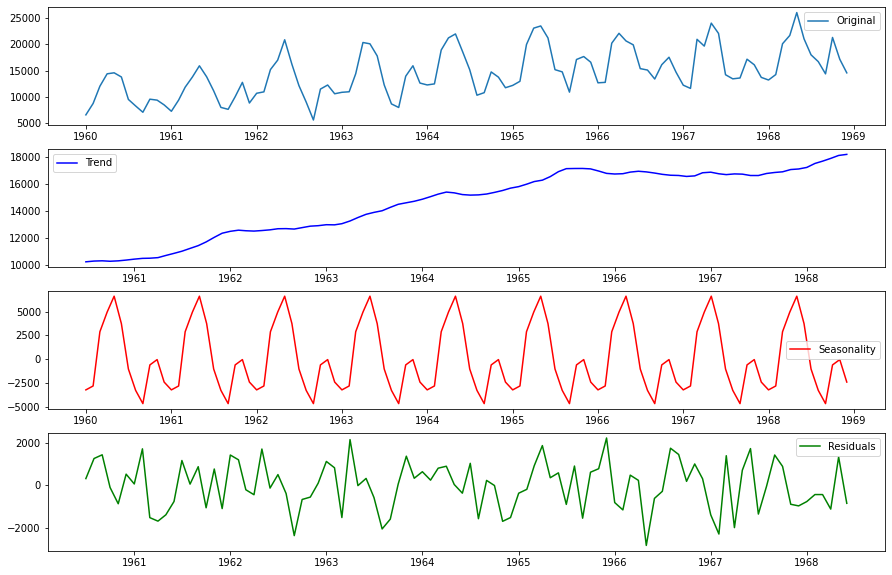

In [0]:
fig, axes = plt.subplots(4, 1) 
fig.set_figheight(10) 
fig.set_figwidth(15)  
axes[0].plot(data, label='Original') 
axes[0].legend()  
axes[1].plot(est_trend, label='Trend',color="b") 
axes[1].legend()  
axes[2].plot(est_seasonal, label='Seasonality',color='r') 
axes[2].legend()  
axes[3].plot(est_residual, label='Residuals',color='g') 
axes[3].legend()

In [0]:
data_array = np.array(data['Sales']) 
partitions = np.split(data_array, indices_or_sections=9) 
print("Mean of Partitions") 
np.mean(partitions, axis=1)  
print("-"*20) 
print("Variance of Partitions") 
np.var(partitions, axis=1)

Mean of Partitions
--------------------
Variance of Partitions


array([ 7245847.05555556,  7227869.90972222, 15214192.72222222,
       15455768.07638889, 15192428.90972222, 16068606.58333333,
       10019305.74305556, 16068784.38888889, 14015880.13888889])

In [0]:
from statsmodels.tsa.stattools import adfuller 
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(data_array)

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose  
ss_decomposition = seasonal_decompose(x=data_array, model='additive',freq=12) 
est_trend = ss_decomposition.trend 
est_seasonal = ss_decomposition.seasonal 
est_residual = ss_decomposition.resid

In [0]:
print(est_trend) 
print(est_seasonal) 
print(est_residual)

[           nan            nan            nan            nan
            nan            nan 10215.29166667 10270.83333333
 10289.875      10256.54166667 10286.875      10343.91666667
 10413.70833333 10470.75       10482.625      10525.58333333
 10686.625      10843.08333333 11001.41666667 11210.29166667
 11415.95833333 11690.5        12032.16666667 12338.75
 12479.75       12564.         12521.5        12497.20833333
 12537.04166667 12589.70833333 12671.04166667 12679.5
 12647.125      12754.375      12862.58333333 12897.54166667
 12969.875      12960.29166667 13045.25       13247.41666667
 13503.16666667 13741.70833333 13885.45833333 14006.70833333
 14258.54166667 14484.33333333 14599.625      14710.125
 14863.125      15053.58333333 15240.83333333 15392.91666667
 15336.16666667 15208.16666667 15167.5        15184.54166667
 15248.75       15370.08333333 15511.41666667 15686.08333333
 15797.75       15984.20833333 16174.375      16277.75
 16541.125      16908.45833333 17132.04166667 17

In [0]:
new_adf, new_pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[6:-6]) 
print("New ADF : ", new_adf) 
print("Critical Values: ", critical_values_) 
print("New P-value: ", new_pvalue)

New ADF :  -4.523855907435011
Critical Values:  {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}
New P-value:  0.00017801721326346934


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   95
Model:                 ARIMA(9, 1, 0)   Log Likelihood                -865.796
Method:                       css-mle   S.D. of innovations           2139.147
Date:                Tue, 31 Mar 2020   AIC                           1753.593
Time:                        15:45:45   BIC                           1781.685
Sample:                             1   HQIC                          1764.944
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.6354     61.383      1.477      0.143     -29.672     210.943
ar.L1.D.y     -0.2018      0.090     -2.251      0.027      -0.378      -0.026
ar.L2.D.y     -0.1032      0.081     -1.269      0.2

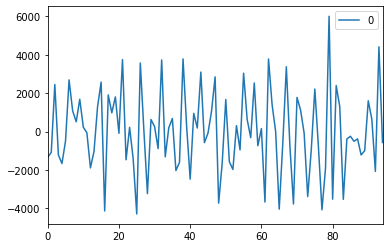

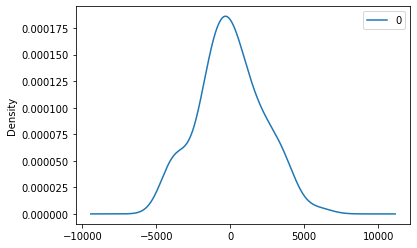

                 0
count    95.000000
mean      4.752791
std    2174.702604
min   -4284.631569
25%   -1325.153710
50%     -80.867869
75%    1357.040024
max    6008.097771


In [0]:
from statsmodels.tsa.arima_model import ARIMA  
# fitting the model on the 96 values 
# removing the 12 NaN's values  
model = ARIMA(data_array[6:-6], order=(9,1,0)) 
model_fit = model.fit(disp=0) 
print(model_fit.summary()) 
# plot residual errors 
residuals = pd.DataFrame(model_fit.resid) 
residuals.plot() 
plt.show() 
residuals.plot(kind='kde') 
plt.show() 
print(residuals.describe())